<a href="https://colab.research.google.com/github/JaydaBubel/lab-cleaning-categorical-data/blob/master/lab_cleaning_categorical_data_JaydaB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Ironhack/we_fn_use_c_marketing_customer_value_analysis-3.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv(""))**

In [4]:
customer_df = pd.read_csv("/content/drive/MyDrive/Ironhack/we_fn_use_c_marketing_customer_value_analysis-3.csv")

**3. First, look at its main features (head, shape, info).**

In [5]:
customer_df.shape

(9134, 24)

In [6]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


**4. Rename the columns so they follow the PE8 (snake case).**

In [7]:
customer_df = customer_df.rename(columns=lambda x: x.lower().replace(' ', '_'))
customer_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


**5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.**

In [8]:
data_types = customer_df.dtypes
print(data_types)

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object


In [9]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


**6. Plot a correlation matrix, and comment on what you observe.**

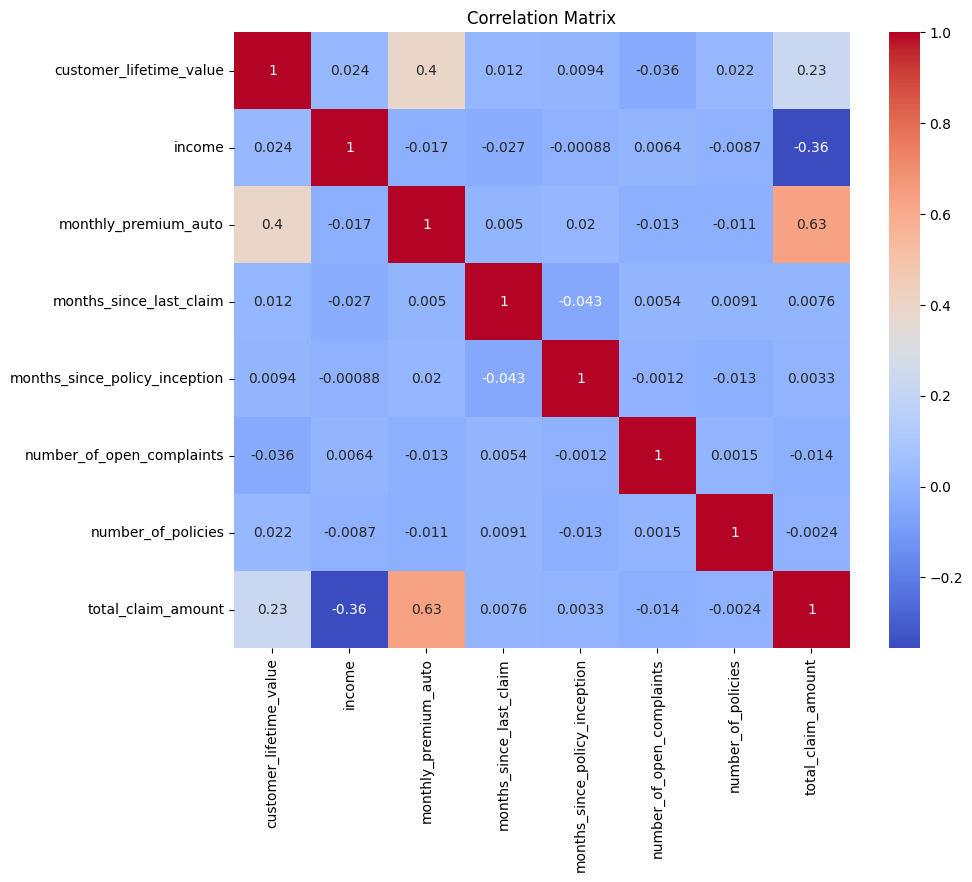

In [10]:
correlation_matrix = customer_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

A fairly strong correlation between monthly_premium_auto and total_claim_amount is shown (0.63). This points to the tendency, that customers who pay higher monthly premiums for their car, also submit higher claim amounts. This doesnt necessarily point to causation, but would logically make sense.

**7. Plot every continuous variable. Comment what you can see in the plots.**

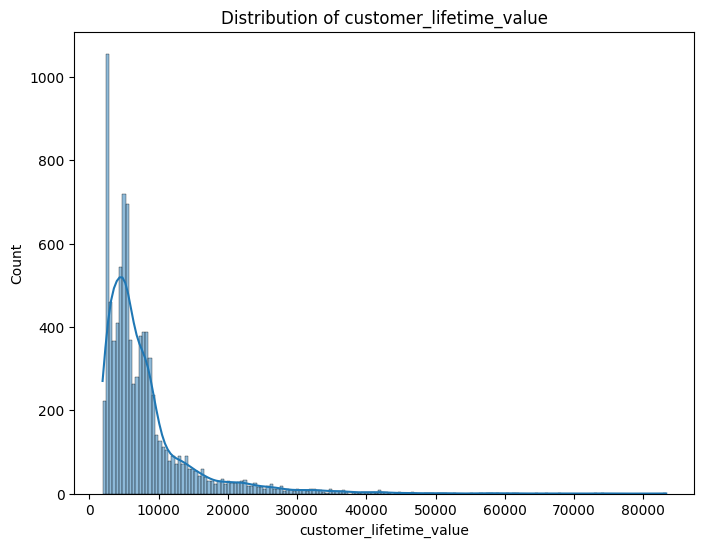

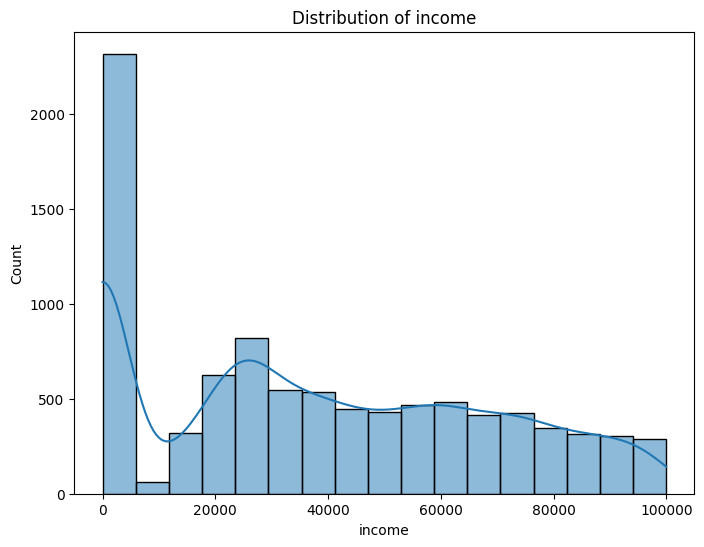

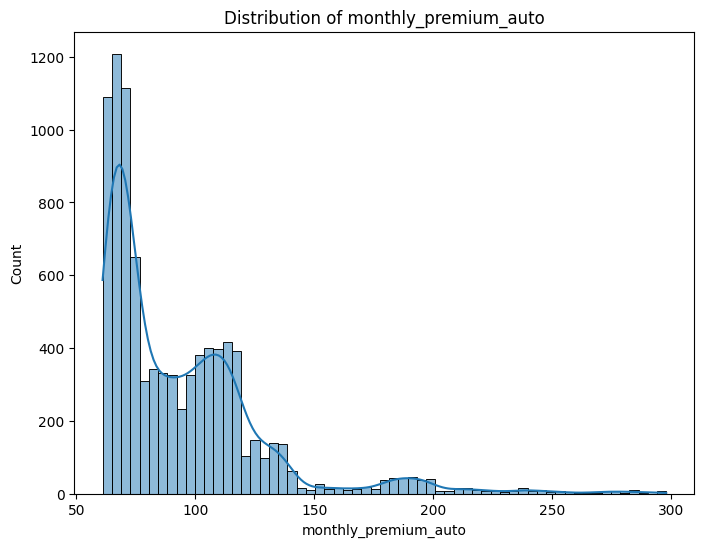

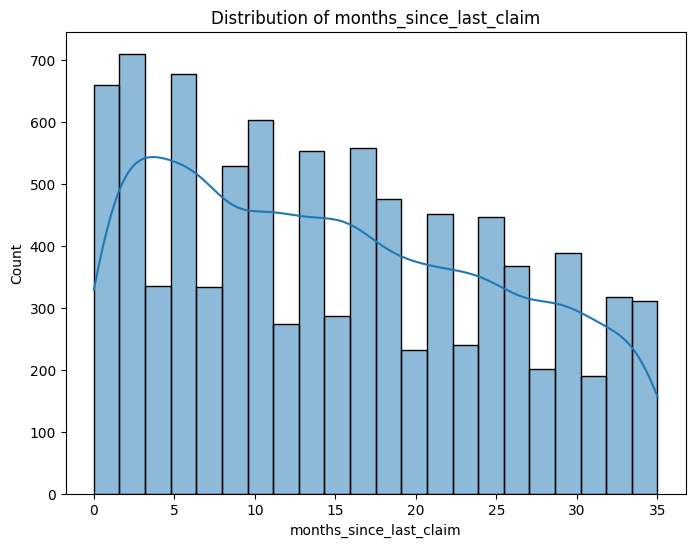

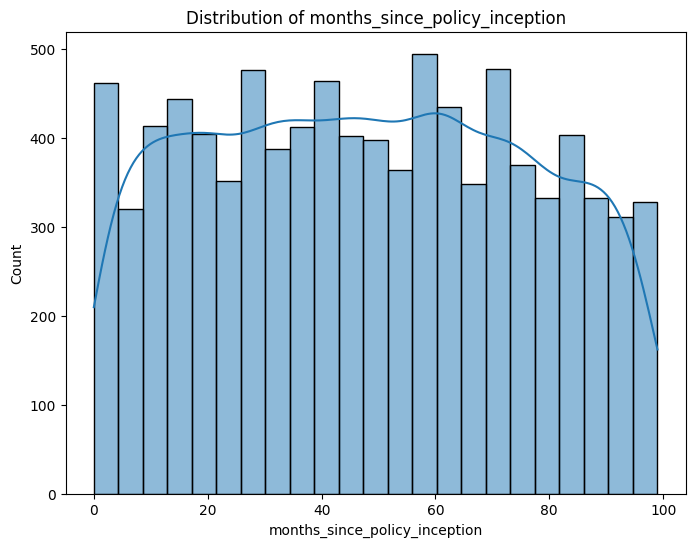

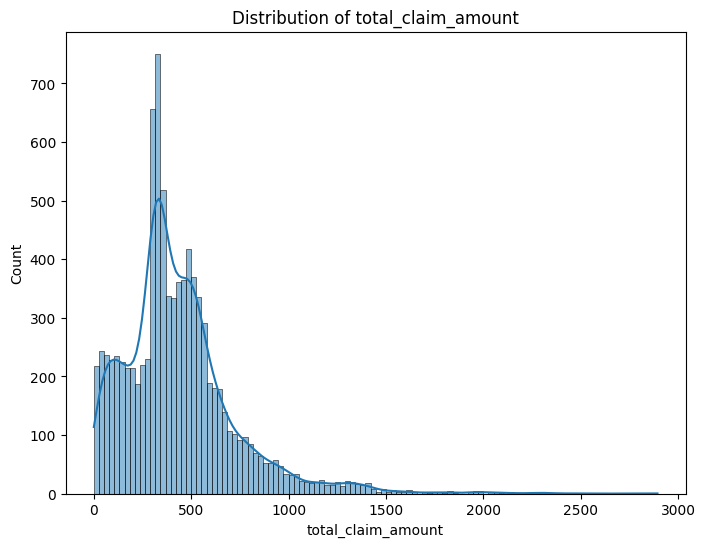

In [11]:
# Define the variables of interest
var_list = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim',
                   'months_since_policy_inception', 'total_claim_amount']

# Generate individual distribution plots
for variable in var_list:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=customer_df, x=variable, kde=True)
    plt.title("Distribution of " + variable)
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.show()

**8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.**

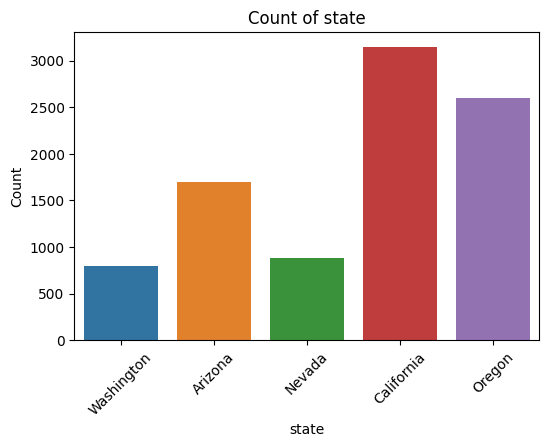

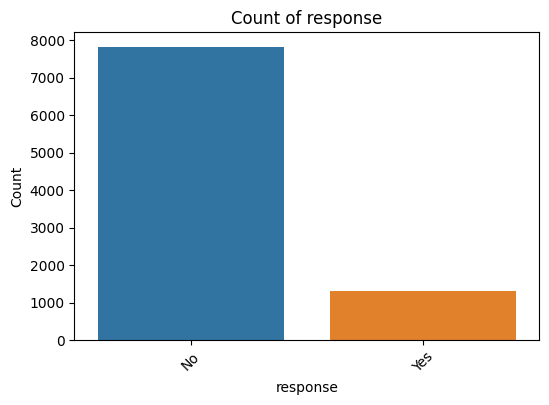

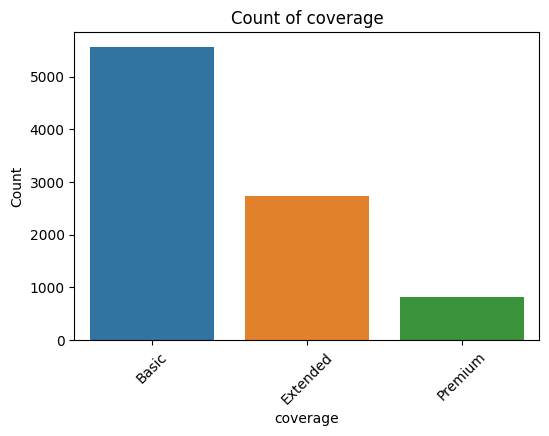

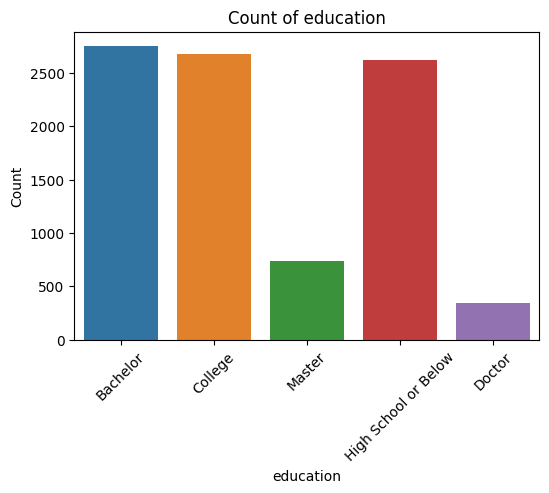

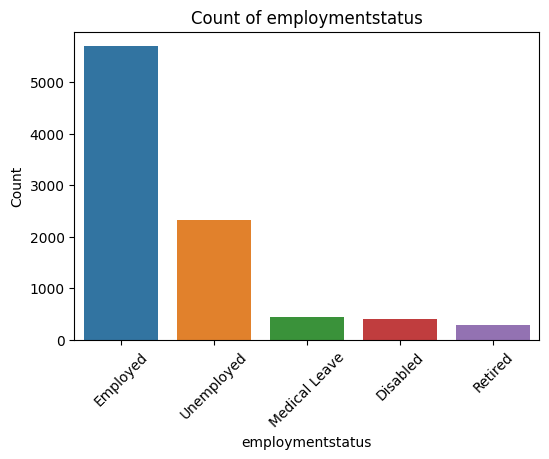

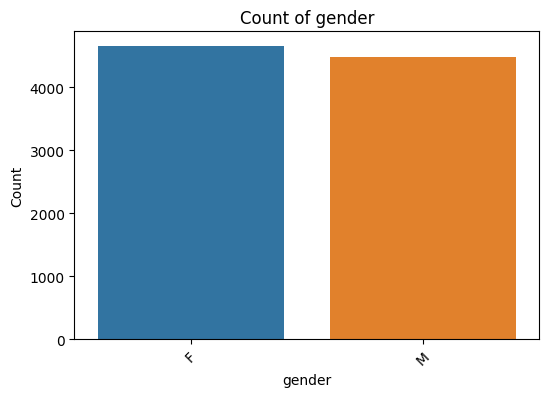

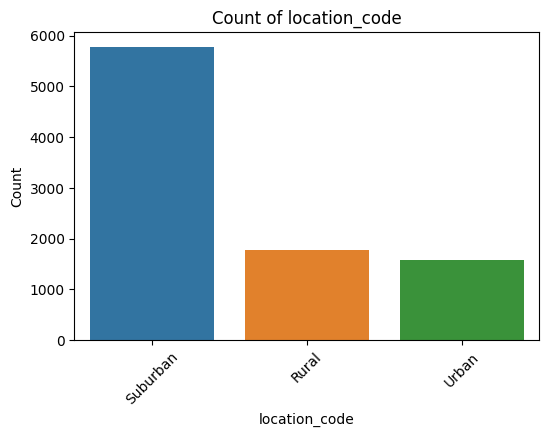

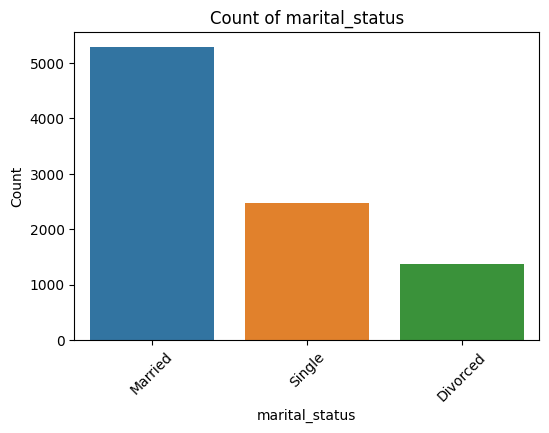

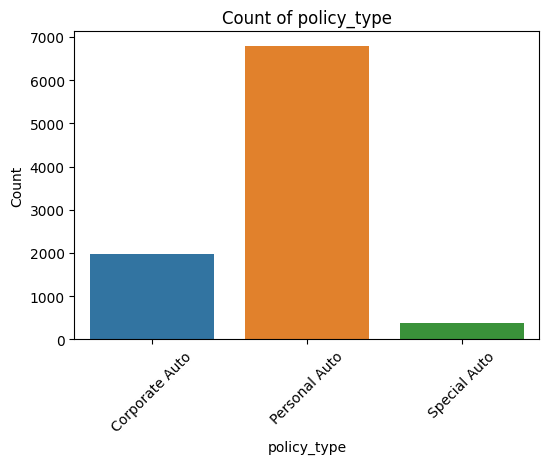

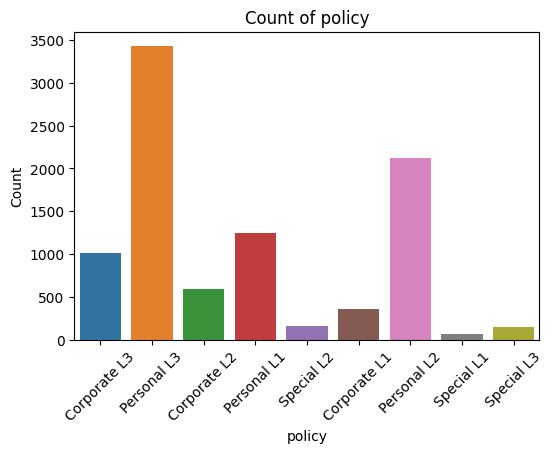

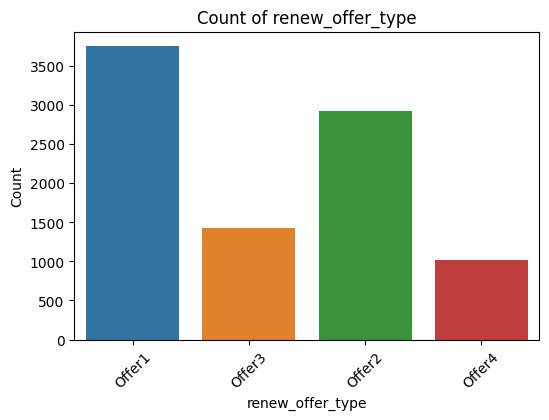

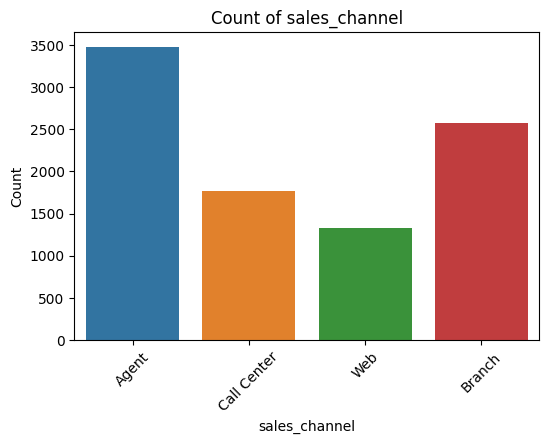

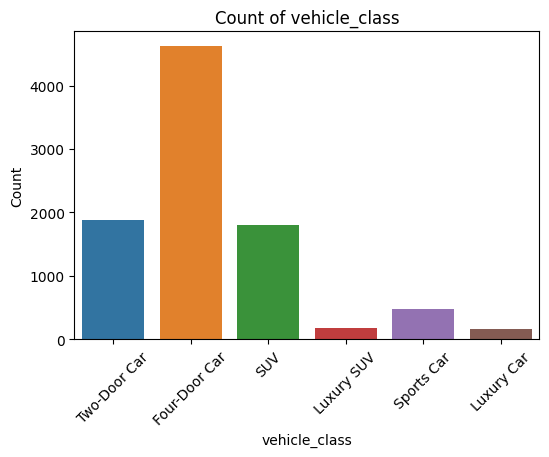

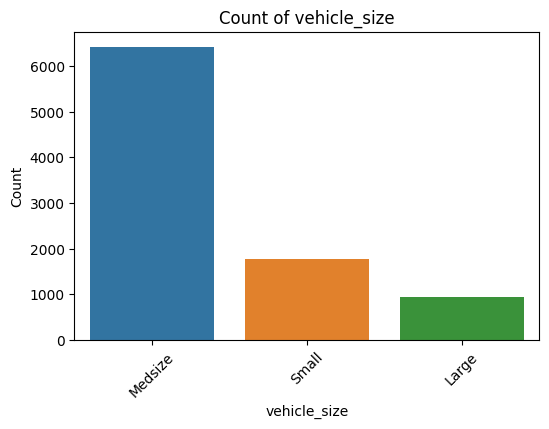

In [12]:
# Select only the categorical variables
categorical_vars = ['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender',
                    'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type',
                    'sales_channel', 'vehicle_class', 'vehicle_size']

# Generate bar plots for each categorical variable
for column in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=customer_df, x=column)
    plt.title("Count of " + column)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

We don't include customer_id because its a unique identifier; it cant be meaningfully plotted as a categorical or numerical value, but is rather a reference point.

**9. Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.**

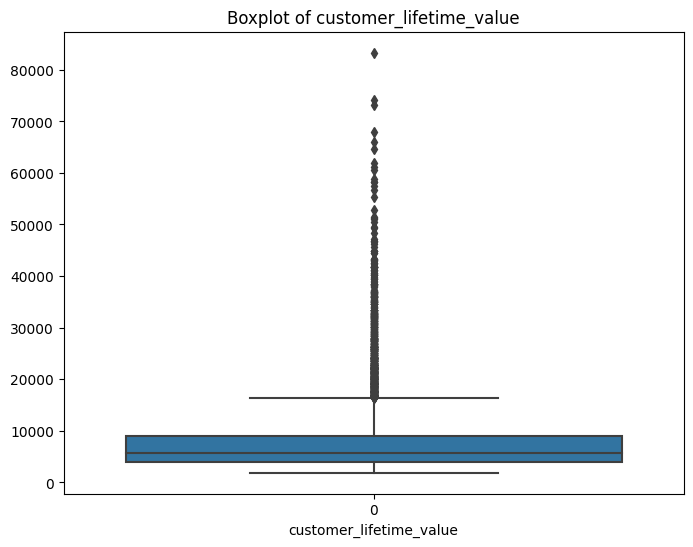

In [13]:
continuous_vars = ['customer_lifetime_value']

# Plot boxplots for each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=customer_df[var])
    plt.title("Boxplot of " + var)
    plt.xlabel(var)
    plt.show()

In [ ]:
rows_to_remove = len(customer_df[customer_df['customer_lifetime_value'] > 18000])
print("Number of rows to be removed:", rows_to_remove)

Number of rows to be removed: 689


the outliers seem to begin above a value of 180000. If these were removed, 689 rows must be removed, which would be around 7% of the rows. For now, i would keep them.

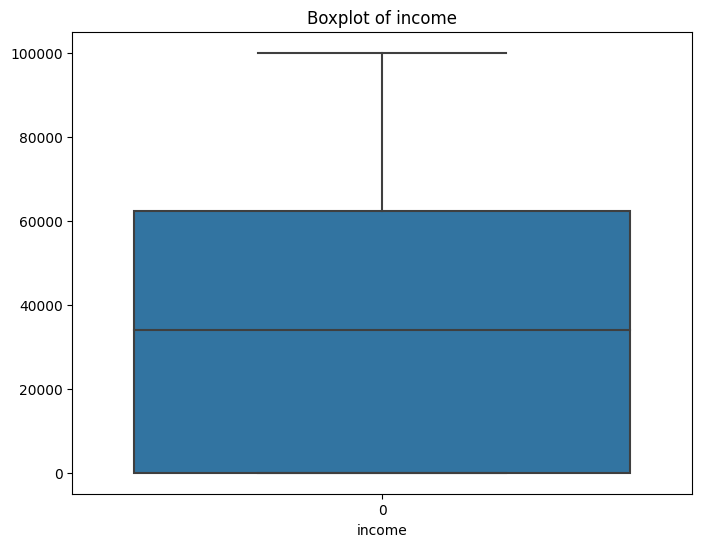

In [ ]:
continuous_vars = ['income']

# Plot boxplots for each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=customer_df[var])
    plt.title("Boxplot of " + var)
    plt.xlabel(var)
    plt.show()

In [ ]:
#check the range for "income" - why doesn't 99981 show up as an outlier on the boxplot?
income_range = (customer_df['income'].min(), customer_df['income'].max())
print("Income range:", income_range)

Income range: (0, 99981)


It appears that there are no outliers.


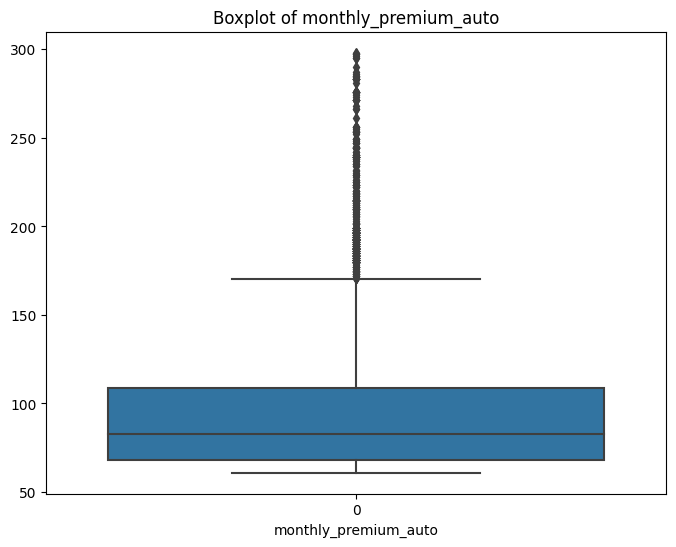

In [ ]:
continuous_vars = ['monthly_premium_auto']

# Plot boxplots for each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=customer_df[var])
    plt.title("Boxplot of " + var)
    plt.xlabel(var)
    plt.show()

In [ ]:
rows_to_remove = len(customer_df[customer_df['monthly_premium_auto'] > 170])
print("Number of rows to be removed:", rows_to_remove)

Number of rows to be removed: 430


If we removed outliers, ca. 430 would go. Since there isn't a pool or significant amount of outliers with extreme difference to the majority, i would leave them.


**10. Check all columns for NaN values. Decide what (if anything) you will need to do with them.**

In [15]:
nan_counts = customer_df.isna().sum()
print(nan_counts)

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


### **Section 2 / Lab 2: Cleaning categorical Data**


**3. What should we do with the customer_id column?**

In [32]:
# check column list
column_list = customer_df.columns.tolist()
print(column_list)

['customer', 'state', 'customer_lifetime_value', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'income', 'location_code', 'marital_status', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size']


In [33]:
# drop customer column
customer_df = customer_df.drop("customer", axis=1)

It has been dropped, as it's a unique value and won't tell us much/make a pointless plot.

**4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
numerical_df = customer_df.select_dtypes()
categorical_df = customer_df.select_dtypes()**

In [34]:
numericals = customer_df.select_dtypes(np.number)
categoricals = customer_df.select_dtypes(np.object)
numericals.shape, categoricals.shape

((9134, 8), (9134, 14))

**5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis**

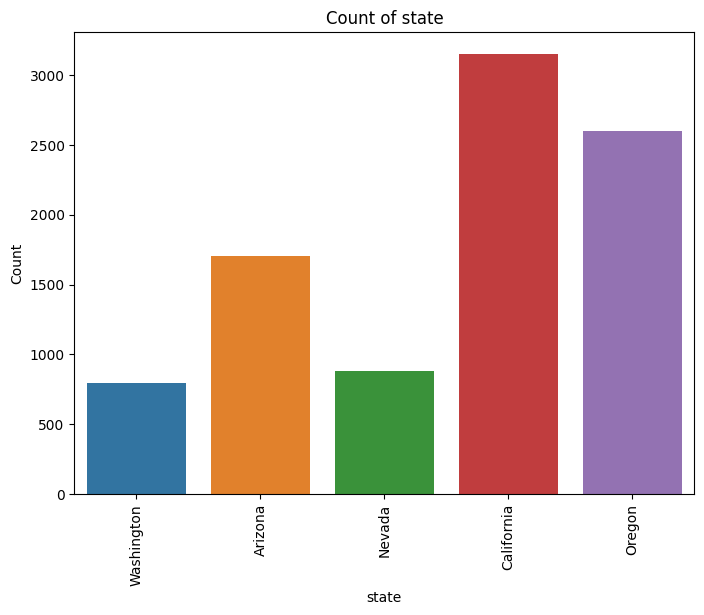

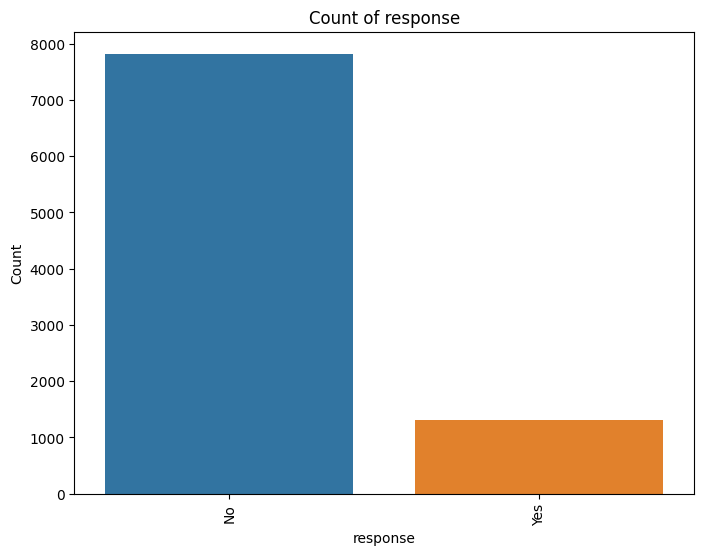

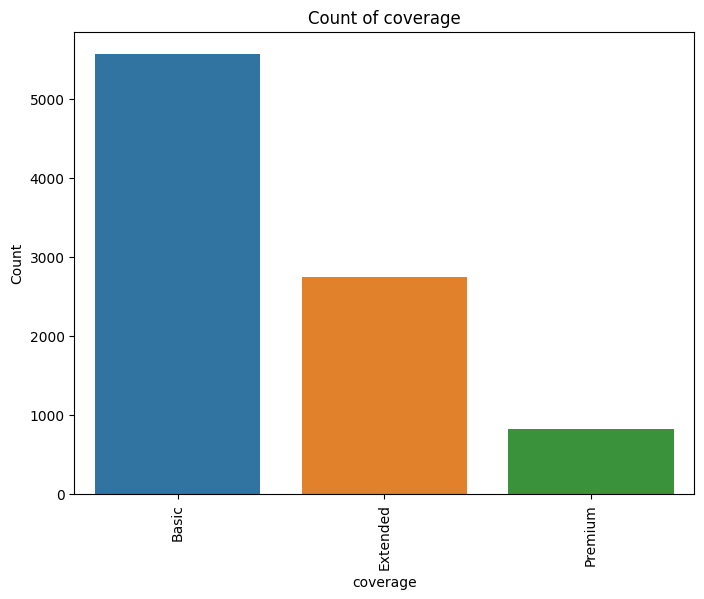

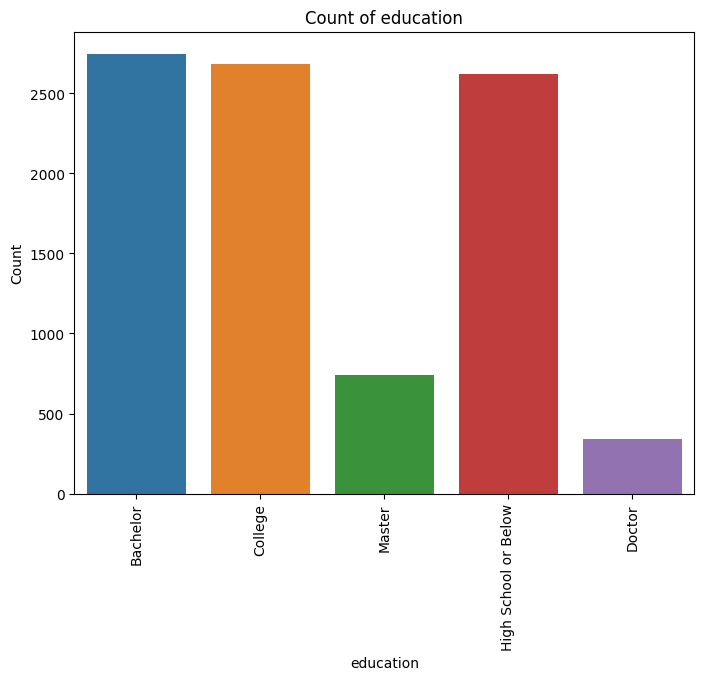

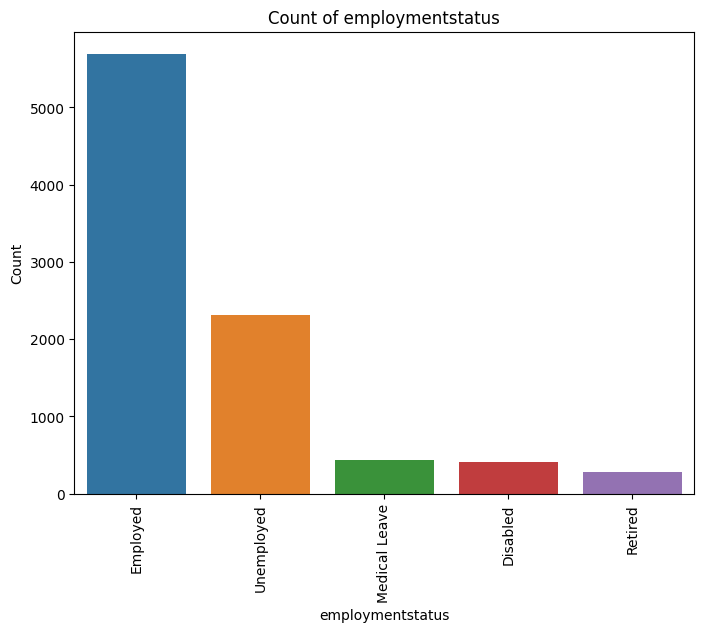

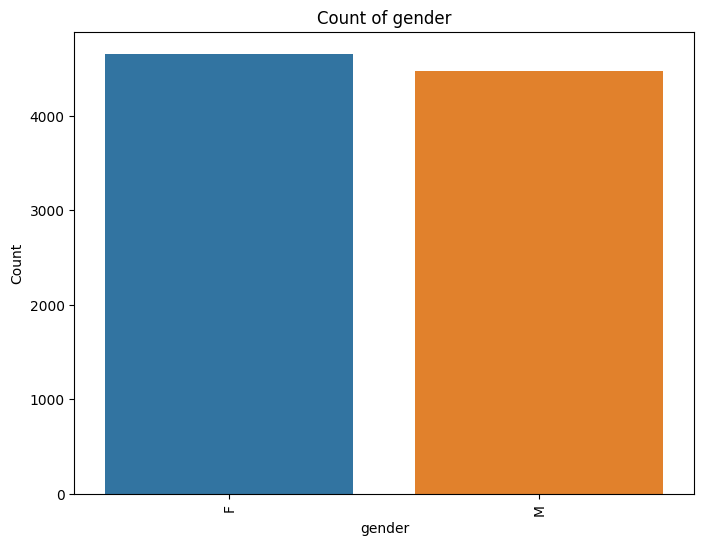

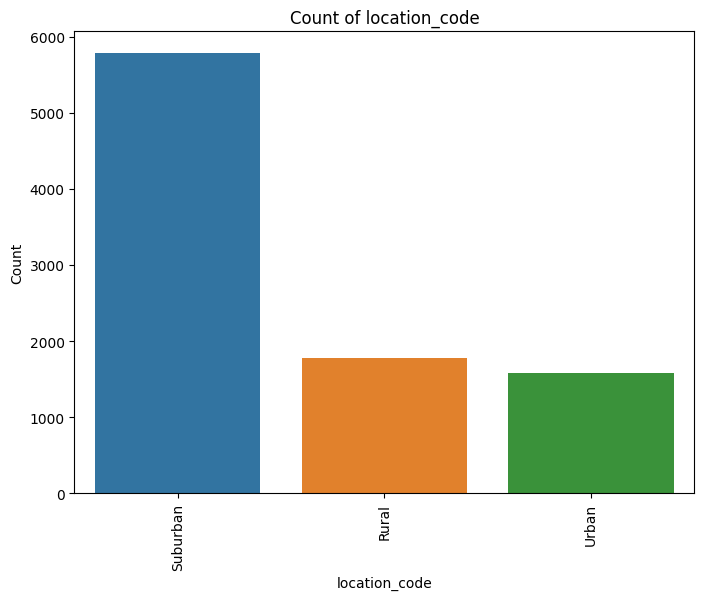

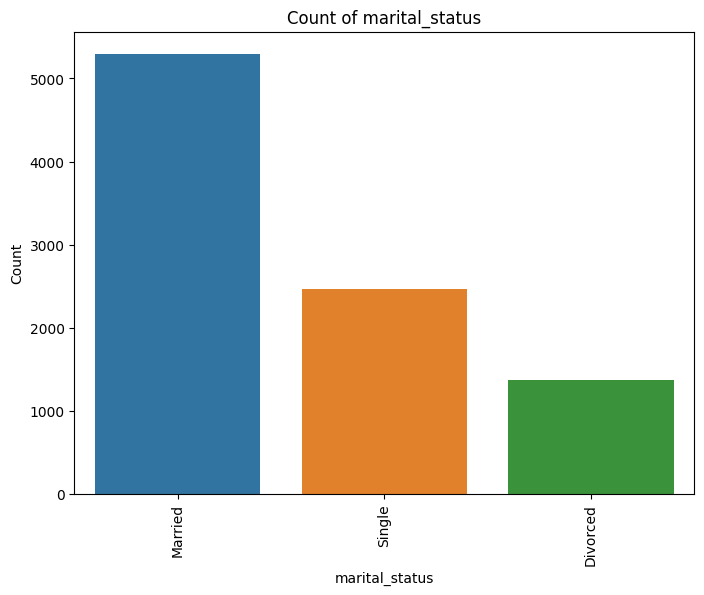

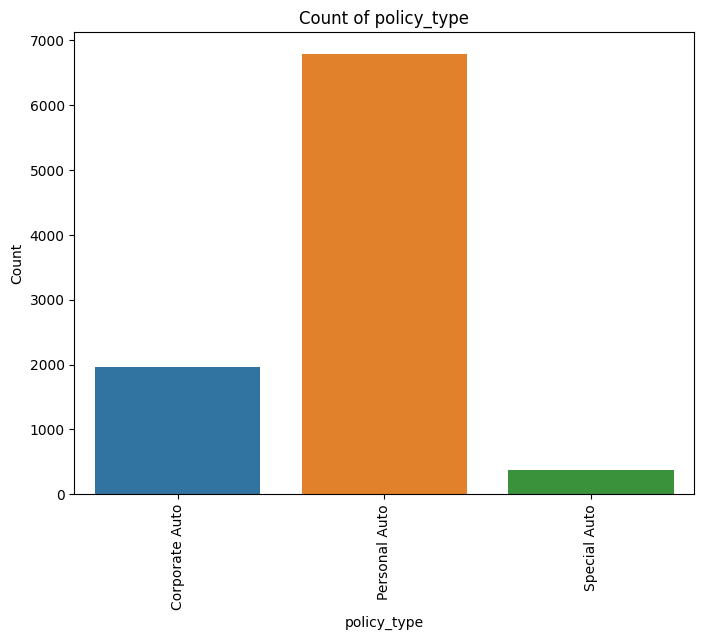

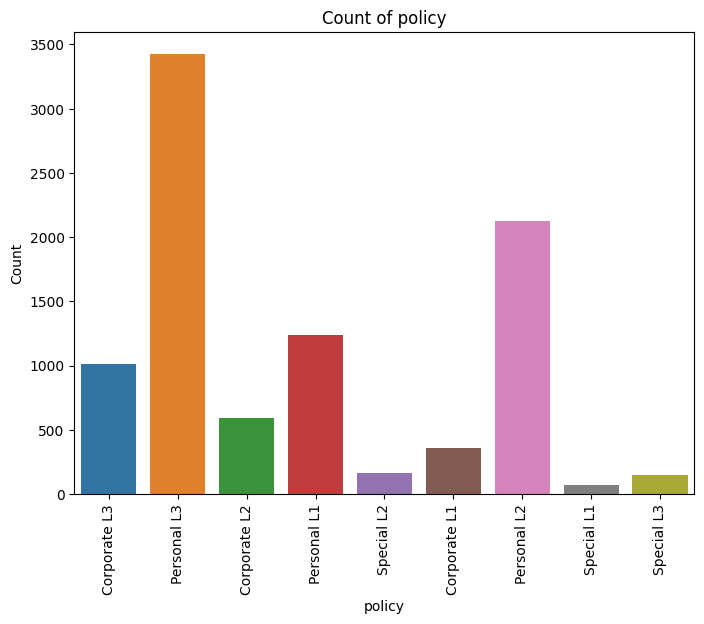

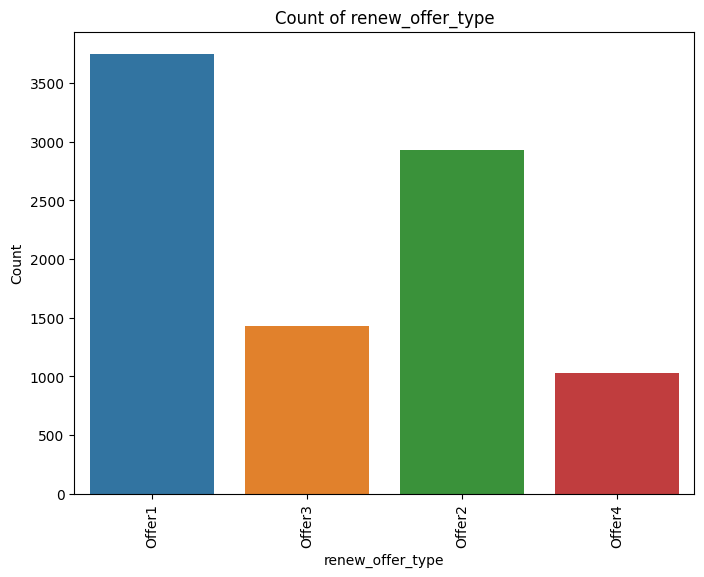

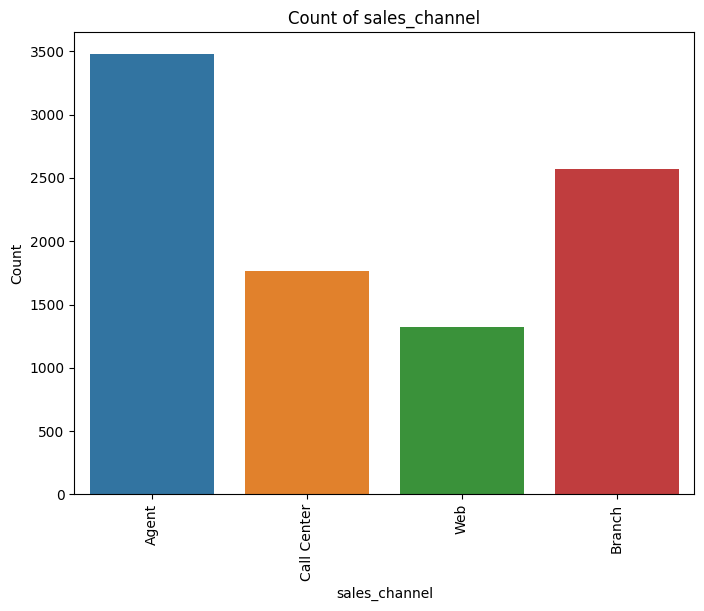

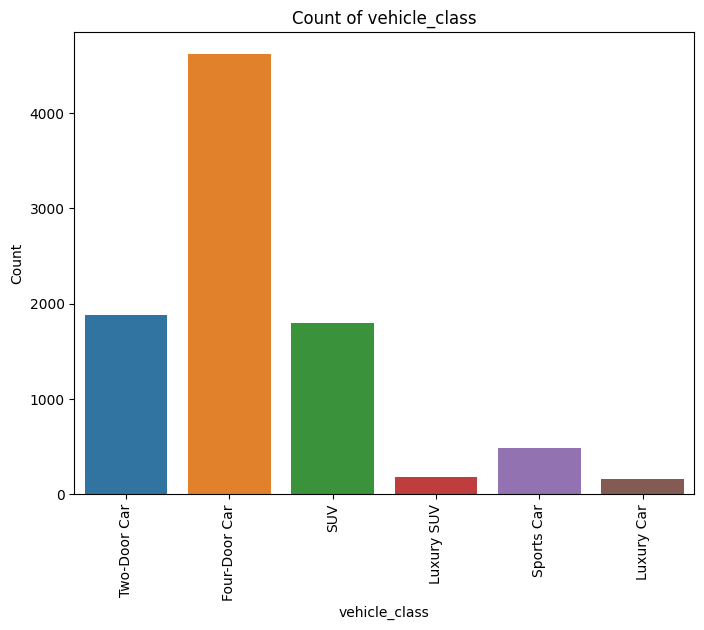

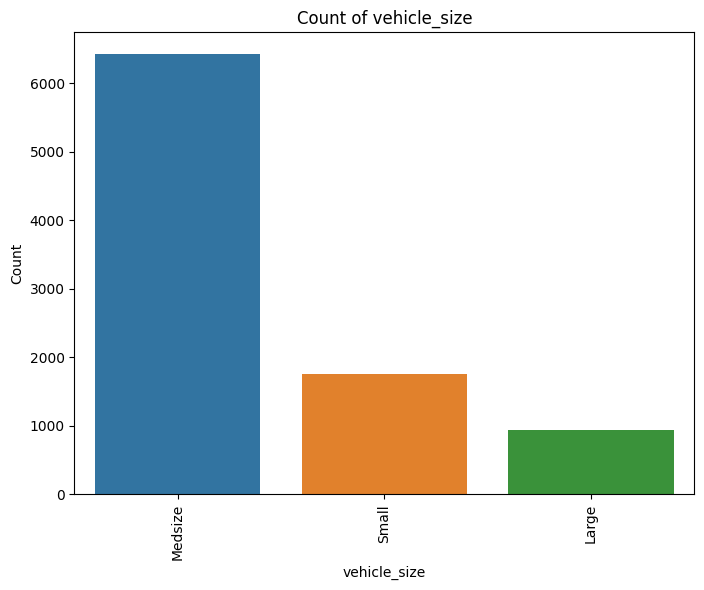

In [35]:
# use sns.countplot for plot appropriate for categoricals
for col in categoricals.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=customer_df[col])
    plt.title("Count of " + col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

**6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.**

In [26]:
# use function value_counts to give overall view of categories per column
for col in categoricals.columns:
    category_counts = customer_df[col].value_counts()
    print(f"Column: {col}")
    print(category_counts)
    print()

Column: customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

Column: state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

Column: response
No     7826
Yes    1308
Name: response, dtype: int64

Column: coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Column: education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Column: employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

Column: gender
F    4658
M    4476
Name: gender, dtype: int64

Column: location_code
Suburban    5779
Rural       1773
Urban

We can see if some categories might be imablanced, and have few occurances compared to others (doesn't seem to be the case here). While this could cause problems in analysis, a technique like oversampling/undersampling could deal with imbalances.

Also, by looking at the counts per category, we could possibly observe missing values. If a category has 0 or less count (not the case here), it could point to missing data. These values could be filled in or deleted.